In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf


In [4]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [6]:
noise = np.random.randn(len(x_data))

In [8]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [10]:
y_true = (0.5 * x_data) + 5 + noise

In [16]:
x_df = pd.DataFrame(data = x_data, columns=["X Data"])
y_df = pd.DataFrame(data=y_true, columns=['Y'])
y_df.head()

,Y
0,4.019420
1,6.030077
2,6.408123
3,4.230588
4,3.830737


In [17]:
my_data = pd.concat([x_df, y_df], axis=1)

In [18]:
my_data.head()

,X Data,Y
0,0.00000,4.019420
1,0.00001,6.030077
2,0.00002,6.408123
3,0.00003,4.230588
4,0.00004,3.830737


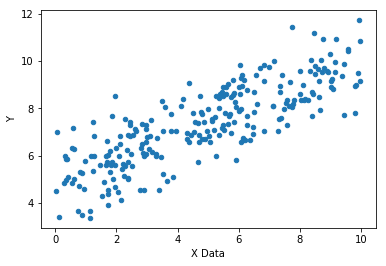

In [20]:
my_data.sample(n=250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

## Feed batches!

In [22]:
batch_size = 8

In [76]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [77]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [25]:
y_model = m*xph + b

In [26]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [28]:
train = optimizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [47]:
rand_ind = np.random.randint(20, size=batch_size)
rand_ind, len(x_data), x_data[793248]



(array([ 5,  7,  7,  8, 19,  0, 10,  0]), 1000000, 7.9324879324879323)

In [71]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m,b])

In [72]:
model_m, model_b

(0.52129716, 5.0397434)

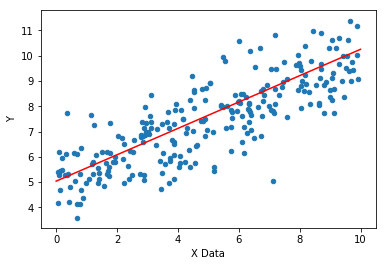

In [73]:
y_hat = x_data*model_m + model_b
my_data.sample(250).plot(kind='scatter', x= 'X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

# Estimator

In [78]:
feat_cols = [ tf.feature_column.numeric_column('x', [1]) ]

In [79]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_session_config': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_model_dir': 'C:\\Users\\motos\\AppData\\Local\\Temp\\tmpgjn4fqms', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600}


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [86]:
x_eval.shape[0] + x_train.shape [0]

1000000

In [87]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train,batch_size=8, num_epochs=None, shuffle=True)

In [88]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train,batch_size=8, num_epochs=1000, shuffle=False)
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval,batch_size=8, num_epochs=1000, shuffle=False)

In [89]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\motos\AppData\Local\Temp\tmpgjn4fqms\model.ckpt.
INFO:tensorflow:step = 1, loss = 431.207
INFO:tensorflow:global_step/sec: 779.783
INFO:tensorflow:step = 101, loss = 16.986 (0.130 sec)
INFO:tensorflow:global_step/sec: 834.88
INFO:tensorflow:step = 201, loss = 17.5362 (0.120 sec)
INFO:tensorflow:global_step/sec: 782.699
INFO:tensorflow:step = 301, loss = 18.2267 (0.127 sec)
INFO:tensorflow:global_step/sec: 874.982
INFO:tensorflow:step = 401, loss = 24.4886 (0.114 sec)
INFO:tensorflow:global_step/sec: 867.413
INFO:tensorflow:step = 501, loss = 20.4181 (0.116 sec)
INFO:tensorflow:global_step/sec: 811.218
INFO:tensorflow:step = 601, loss = 14.7059 (0.123 sec)
INFO:tensorflow:global_step/sec: 845.449
INFO:tensorflow:step = 701, loss = 6.00585 (0.120 sec)
INFO:tensorflow:global_step/sec: 801.486
INFO:tensorflow:step = 801, loss = 3.03049 (0.124 sec)
INFO:tensorflow:global_step/sec: 834.875
INFO

In [90]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps = 1000)

INFO:tensorflow:Starting evaluation at 2018-10-26-10:03:13
INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmpgjn4fqms\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [91]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps = 1000)

INFO:tensorflow:Starting evaluation at 2018-10-26-10:03:59
INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmpgjn4fqms\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [646/1000]
INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorf

In [94]:
print('TRAINING METRICS')
print(train_metrics)

TRAINING METRICS
{'global_step': 1000, 'loss': 8.4361696, 'average_loss': 1.0545212}


In [95]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'global_step': 1000, 'loss': 8.8203545, 'average_loss': 1.1025443}


In [97]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmpgjn4fqms\model.ckpt-1000


[{'predictions': array([ 4.44317818], dtype=float32)},
 {'predictions': array([ 5.09221363], dtype=float32)},
 {'predictions': array([ 5.74124861], dtype=float32)},
 {'predictions': array([ 6.39028358], dtype=float32)},
 {'predictions': array([ 7.03931904], dtype=float32)},
 {'predictions': array([ 7.68835402], dtype=float32)},
 {'predictions': array([ 8.33738899], dtype=float32)},
 {'predictions': array([ 8.98642445], dtype=float32)},
 {'predictions': array([ 9.6354599], dtype=float32)},
 {'predictions': array([ 10.2844944], dtype=float32)}]

In [99]:
predictions = []
for pred in list(estimator.predict(input_fn=input_fn_predict)):
    predictions.append(pred['predictions'])
predictions

INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmpgjn4fqms\model.ckpt-1000


[array([ 4.44317818], dtype=float32),
 array([ 5.09221363], dtype=float32),
 array([ 5.74124861], dtype=float32),
 array([ 6.39028358], dtype=float32),
 array([ 7.03931904], dtype=float32),
 array([ 7.68835402], dtype=float32),
 array([ 8.33738899], dtype=float32),
 array([ 8.98642445], dtype=float32),
 array([ 9.6354599], dtype=float32),
 array([ 10.2844944], dtype=float32)]

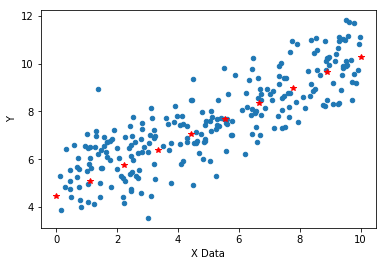

In [101]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, '*r')